In [7]:
# Import packages
## Warnings
import warnings
## Prepare and explore data
import pandas as pd # Data manipulation
import numpy as np # Numeric computations
import matplotlib.pyplot as plt
import seaborn as sns

## Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV # Split training and test data, Cross validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Model evaluation
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor #Linear models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Ensemble models
from sklearn.tree import DecisionTreeRegressor # Decision Tree
from xgboost import XGBRegressor # Extreme gradient boostng
from category_encoders import OneHotEncoder, OrdinalEncoder # Categorical encoder
from sklearn.pipeline import make_pipeline # Pipeline
from joblib import dump # Save model

warnings.simplefilter(action="ignore", category=FutureWarning)

# Prepare Data
## Import 

In [2]:
# Import dataset
df = pd.read_csv("data/height_prediction.csv")

## Explore

In [3]:
# Dimensions of the dataset
df.shape

(371, 4)

In [4]:
# Dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          371 non-null    int64  
 1   gender       371 non-null    object 
 2   mean_ulna    371 non-null    float64
 3   mean_height  371 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.7+ KB


In [5]:
# View first five rows
df.head()

,age,gender,mean_ulna,mean_height
0,51,male,29.0,164.3
1,53,male,29.0,168.1
2,69,female,24.0,161.0
3,57,male,29.0,164.1
4,66,male,31.0,171.0


In [6]:
# Describe dataset
df.describe()

,age,mean_ulna,mean_height
count,371.000000,371.000000,371.000000
mean,52.377358,27.534232,161.788275
std,17.060874,1.807174,7.322653
min,18.000000,23.200000,142.800000
25%,40.000000,26.350000,157.000000
50%,55.000000,27.500000,161.000000
75%,65.000000,28.550000,166.250000
max,90.000000,32.200000,181.500000


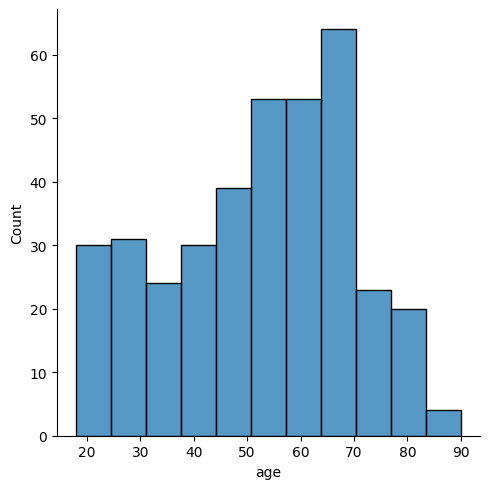

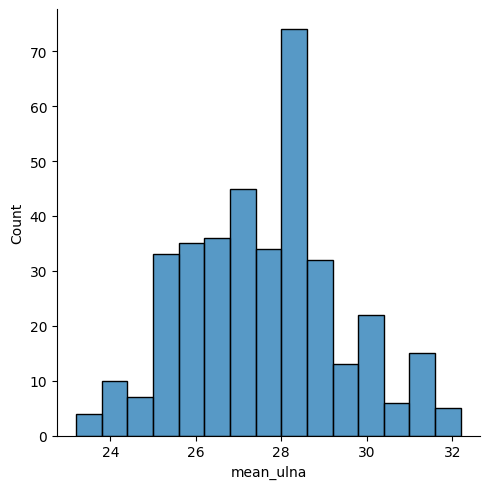

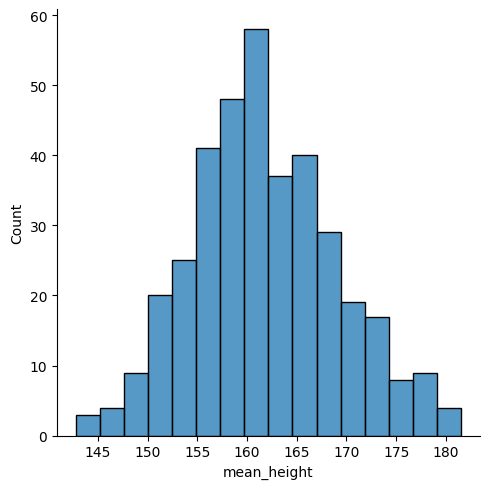

In [10]:
# Distribution of age, ulna length and height
# Age distribution
sns.displot(data = df, x="age")

# Ulna length distribution
sns.displot(data=df, x="mean_ulna")

# Height distribution
sns.displot(data=df, x="mean_height");

## Split

In [6]:
# Specify features
features = ["age", "gender", "mean_ulna"]

# Specify target vector
target = "mean_height"

# Subset features
X = df[features]

# Subset target
y = df[target]

# Split dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# Inspect split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 3)
(75, 3)
(296,)
(75,)


In [7]:
y_train.head()

192    163.0
75     157.8
84     152.1
359    156.0
16     164.0
Name: mean_height, dtype: float64

# Build model
## Baseline

In [8]:
# Mean of the target
y_mean = y_train.mean()

# Generate baseline predictions
y_pred_baseline = [y_mean] * len(y_train)

# Evaluate baseline predictions
## Mean absolute error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Baseline mean absolute error", mae_baseline)

## Mean squared error
mse_baseline = mean_squared_error(y_train, y_pred_baseline)
print("Baseline mean squared error", mse_baseline)

## Root mean squared error
rmse_baseline = np.sqrt(mean_squared_error(y_train, y_pred_baseline))
print("Baseline root mean squared error", rmse_baseline)

# R2 score
r2_baseline = r2_score(y_train, y_pred_baseline)
print("Baseline coefficient of determination", r2_baseline)

Baseline mean absolute error 5.956830944119795
Baseline mean squared error 54.23890199849341
Baseline root mean squared error 7.3647065113617
Baseline coefficient of determination 0.0


## Iterate

### Linear regression

In [9]:
# Build model
lr_model = make_pipeline(
    OneHotEncoder(),
    LinearRegression()
)

# Fit model
lr_model.fit(X_train, y_train)

# Predict for training data
y_pred_linear = lr_model.predict(X_train)

# Evaluate baseline predictions
# Mean absolute error
mae_linear = mean_absolute_error(y_train, y_pred_linear)
print("Training mean absolute error (Linear)", mae_linear)

# Mean squared error
mse_linear = mean_squared_error(y_train, y_pred_linear)
print("Training mean squared error (Linear)", mse_linear)

# Root mean squared error
rmse_linear = np.sqrt(mean_squared_error(y_train, y_pred_linear))
print("Training root mean squared error (Linear)", rmse_linear)

# R2 score
r2_linear = r2_score(y_train, y_pred_linear)
print("Coefficient of determination (Linear)", r2_linear)

Training mean absolute error (Linear) 3.3598260198110053
Training mean squared error (Linear) 17.72220391653138
Training root mean squared error (Linear) 4.209774805916746
Coefficient of determination (Linear) 0.6732565877343231


### Ridge regression


In [10]:
# Build model
ridge = make_pipeline(
    OneHotEncoder(),
    Ridge(random_state=42)
)

# Fit model
ridge.fit(X_train, y_train)

# Predict for training data
y_pred_ridge = ridge.predict(X_train)

# Evaluate baseline predictions
# Mean absolute error
mae_ridge = mean_absolute_error(y_train, y_pred_ridge)
print("Training mean absolute error (Ridge)", mae_ridge)

# Mean squared error
mse_ridge = mean_squared_error(y_train, y_pred_ridge)
print("Training mean squared error (Ridge)", mse_ridge)

# Root mean squared error
rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print("Training root mean squared error (Ridge)", rmse_ridge)

# R2 score
r2_ridge = r2_score(y_train, y_pred_ridge)
print("Coefficient of determination (Ridge)", r2_ridge)

Training mean absolute error (Ridge) 3.360799155092066
Training mean squared error (Ridge) 17.722732322520113
Training root mean squared error (Ridge) 4.2098375648616315
Coefficient of determination (Ridge) 0.6732468455387907


In [11]:
# Grid search for Ridge regression
ridge_parameters = {
    'ridge__alpha': [0.1, 1, 10, 100, 1000],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_cv = GridSearchCV(ridge, ridge_parameters, cv=5)

# Fit model
ridge_cv.fit(X_train, y_train)

# Predict for training data
y_pred_ridge_cv = ridge_cv.predict(X_train)

# Best parameters and best score from cross validation
print("Best Parameters:", ridge_cv.best_params_)
print("Best Score:", ridge_cv.best_score_)

# Evaluate baseline predictions
# Mean absolute error
mae_ridge_cv = mean_absolute_error(y_train, y_pred_ridge_cv)
print("Training mean absolute error (Ridge)", mae_ridge_cv)

# Mean squared error
mse_ridge_cv = mean_squared_error(y_train, y_pred_ridge_cv)
print("Training mean squared error (Ridge)", mse_ridge_cv)

# Root mean squared error
rmse_ridge_cv = np.sqrt(mean_squared_error(y_train, y_pred_ridge_cv))
print("Training root mean squared error (Ridge)", rmse_ridge_cv)

# R2 score
r2_ridge_cv = r2_score(y_train, y_pred_ridge_cv)
print("Coefficient of determination (Ridge)", r2_ridge_cv)

Best Parameters: {'ridge__alpha': 1, 'ridge__solver': 'saga'}
Best Score: 0.6509778110352706
Training mean absolute error (Ridge) 3.3611494891012974
Training mean squared error (Ridge) 17.72310069381754
Training root mean squared error (Ridge) 4.209881315882615
Coefficient of determination (Ridge) 0.6732400538950838


### Lasso

In [12]:
# Build model
lasso = make_pipeline(
    OneHotEncoder(),
    Lasso(random_state=42)
)

# Fit model
lasso.fit(X_train, y_train)

# Predict for training data
y_pred_lasso = lasso.predict(X_train)

# Evaluate baseline predictions
# Mean absolute error
mae_lasso = mean_absolute_error(y_train, y_pred_lasso)
print("Training mean absolute error (Lasso)", mae_lasso)

# Mean squared error
mse_lasso = mean_squared_error(y_train, y_pred_lasso)
print("Training mean squared error (Lasso)", mse_lasso)

# Root mean squared error
rmse_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso))
print("Training root mean squared error (Lasso)", rmse_lasso)

# R2 score
r2_lasso = r2_score(y_train, y_pred_lasso)
print("Coefficient of determination (Lasso)", r2_lasso)

Training mean absolute error (Lasso) 3.8676133080167543
Training mean squared error (Lasso) 22.908404470964527
Training root mean squared error (Lasso) 4.786272502790092
Coefficient of determination (Lasso) 0.5776388601745506


In [13]:
# Grid search for Lasso model
lasso_parameters = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
    
lasso_cv = GridSearchCV(lasso, lasso_parameters, cv=5)

# Fit model
lasso_cv.fit(X_train, y_train)

# Predict for training data
y_pred_lasso_cv = lasso_cv.predict(X_train)

# Best parameters and best score from cross validation
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

# Evaluate baseline predictions
# Mean absolute error
mae_lasso_cv = mean_absolute_error(y_train, y_pred_lasso_cv)
print("Training mean absolute error (Lasso)", mae_lasso_cv)

# Mean squared error
mse_lasso_cv = mean_squared_error(y_train, y_pred_lasso_cv)
print("Training mean squared error (Lasso)", mse_lasso_cv)

# Root mean squared error
rmse_lasso_cv = np.sqrt(mean_squared_error(y_train, y_pred_lasso_cv))
print("Training root mean squared error (Lasso)", rmse_lasso_cv)

# R2 score
r2_lasso_cv = r2_score(y_train, y_pred_lasso_cv)
print("Coefficient of determination (Lasso)", r2_lasso_cv)

Best Parameters: {'lasso__alpha': 0.01}
Best Score: 0.6508809302002576
Training mean absolute error (Lasso) 3.3607827795791265
Training mean squared error (Lasso) 17.72275252317157
Training root mean squared error (Lasso) 4.2098399640807695
Coefficient of determination (Lasso) 0.6732464731003616


### Elastic net

In [14]:
# Build model
elastic = make_pipeline(
    OneHotEncoder(),
    ElasticNet(random_state=42)
)

# Fit model
elastic.fit(X_train, y_train)

# Predict for training data
y_pred_elastic = elastic.predict(X_train)

# Evaluate baseline predictions
# Mean absolute error
mae_elastic = mean_absolute_error(y_train, y_pred_elastic)
print("Training mean absolute error (ElasticNet)", mae_elastic)

# Mean squared error
mse_elastic = mean_squared_error(y_train, y_pred_elastic)
print("Training mean squared error (ElasticNet)", mse_elastic)

# Root mean squared error
rmse_elastic = np.sqrt(mean_squared_error(y_train, y_pred_elastic))
print("Training root mean squared error (ElasticNet)", rmse_elastic)

# R2 score
r2_elastic = r2_score(y_train, y_pred_elastic)
print("Coefficient of determination (Elastic)", r2_elastic)

Training mean absolute error (ElasticNet) 3.7217925323600856
Training mean squared error (ElasticNet) 21.352749653892875
Training root mean squared error (ElasticNet) 4.620903553840187
Coefficient of determination (Elastic) 0.6063203924281877


In [15]:
# Grid Search CV for ElasticNet
elastic_parameters = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'elasticnet__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0],
    'elasticnet__selection': ['cyclic', 'random']
}

elastic_cv = GridSearchCV(elastic, elastic_parameters, cv=5)

# Fit model
elastic_cv.fit(X_train, y_train)

# Predict for training data
y_pred_elastic_cv = elastic_cv.predict(X_train)

# Best parameters and best score from cross validation
print("Best Parameters:", elastic_cv.best_params_)
print("Best Score:", elastic_cv.best_score_)

# Evaluate baseline predictions
# Mean absolute error
mae_elastic_cv = mean_absolute_error(y_train, y_pred_elastic_cv)
print("Training mean absolute error (ElasticNet)", mae_elastic_cv)

# Mean squared error
mse_elastic_cv = mean_squared_error(y_train, y_pred_elastic_cv)
print("Training mean squared error (ElasticNet)", mse_elastic_cv)

# Root mean squared error
rmse_elastic_cv = np.sqrt(mean_squared_error(y_train, y_pred_elastic_cv))
print("Training root mean squared error (ElasticNet)", rmse_elastic_cv)

# R2 score
r2_elastic_cv = r2_score(y_train, y_pred_elastic_cv)
print("Coefficient of determination (Elastic)", r2_elastic_cv)

c:\Users\LENOVO\anaconda3\envs\predicting_height\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.240e+03, tolerance: 1.340e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\LENOVO\anaconda3\envs\predicting_height\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.003e+03, tolerance: 1.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

Best Parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.0, 'elasticnet__selection': 'cyclic'}
Best Score: 0.651054776153045
Training mean absolute error (ElasticNet) 3.3626317420104828
Training mean squared error (ElasticNet) 17.726639497392146
Training root mean squared error (ElasticNet) 4.2103015922130975
Coefficient of determination (Elastic) 0.6731748091455735


c:\Users\LENOVO\anaconda3\envs\predicting_height\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.654e+03, tolerance: 1.605e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### Random Forest


In [16]:
# Build model
rf_model = make_pipeline(
    OneHotEncoder(),
    RandomForestRegressor(random_state=42)
)

# Fit model
rf_model.fit(X_train, y_train)

# Predict for training data
y_pred_rf = rf_model.predict(X_train)

# Evaluate baseline predictions
# Mean absolute error
mae_rf = mean_absolute_error(y_train, y_pred_rf)
print("Training mean absolute error (Random Forest)", mae_rf)

# Mean squared error
mse_rf = mean_squared_error(y_train, y_pred_rf)
print("Training mean squared error (Random Forest)", mse_rf)

# Root mean squared error
rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf))
print("Training root mean squared error (Random Forest)", rmse_rf)

# R2 score
r2_rf = r2_score(y_train, y_pred_rf)
print("Coefficient of determination (Random Forest)", r2_rf)

Training mean absolute error (Random Forest) 1.6993276034963478
Training mean squared error (Random Forest) 5.15115593898109
Training root mean squared error (Random Forest) 2.269615813079626
Coefficient of determination (Random Forest) 0.9050283883120611


In [17]:
# Grid Search CV with random forest

rf_parameters = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__max_depth': [10, 20, 30, None],
    'randomforestregressor__max_leaf_nodes': [None, 10, 20, 50, 100],
    'randomforestregressor__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

rf_cv = GridSearchCV(rf_model, rf_parameters, cv=5, n_jobs = -1)

# Fit model
rf_cv.fit(X_train, y_train)

# Predict for training data
y_pred_rf_cv = rf_cv.predict(X_train)

# Best parameters and best score from cross validation
print("Best Parameters:", rf_cv.best_params_)
print("Best Score:", rf_cv.best_score_)

# Evaluate baseline predictions
# Mean absolute error
mae_rf_cv = mean_absolute_error(y_train, y_pred_rf_cv)
print("Training mean absolute error (Random Forest)", mae_rf_cv)

# Mean squared error
mse_rf_cv = mean_squared_error(y_train, y_pred_rf_cv)
print("Training mean squared error (Random Forest)", mse_rf_cv)

# Root mean squared error
rmse_rf_cv = np.sqrt(mean_squared_error(y_train, y_pred_rf_cv))
print("Training root mean squared error (Random Forest)", rmse_rf_cv)

# R2 score
r2_rf_cv = r2_score(y_train, y_pred_rf_cv)
print("Coefficient of determination (Random Forest)", r2_rf_cv)

Best Parameters: {'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_leaf_nodes': 10, 'randomforestregressor__n_estimators': 300}
Best Score: 0.6013956612742823
Training mean absolute error (Random Forest) 3.204513929282441
Training mean squared error (Random Forest) 16.251055326582144
Training root mean squared error (Random Forest) 4.031259769176645
Coefficient of determination (Random Forest) 0.7003800827857181


### Gradient Boosting

In [18]:
# Build model
gb_model = make_pipeline(
    OneHotEncoder(),
    GradientBoostingRegressor(random_state=42)
)

# Fit model
gb_model.fit(X_train, y_train)

# Predict for training data
y_pred_gb = gb_model.predict(X_train)

# Evaluate baseline predictions
# Mean absolute error
mae_gb = mean_absolute_error(y_train, y_pred_gb)
print("Training mean absolute error (Gradient Boosting)", mae_gb)

# Mean squared error
mse_gb = mean_squared_error(y_train, y_pred_gb)
print("Training mean squared error (Gradient Boosting)", mse_gb)

# Root mean squared error
rmse_gb = np.sqrt(mean_squared_error(y_train, y_pred_gb))
print("Training root mean squared error (Gradient Boosting)", rmse_gb)

# R2 score
r2_gb = r2_score(y_train, y_pred_gb)
print("Coefficient of determination (Gradient Boosting)", r2_gb)

Training mean absolute error (Gradient Boosting) 2.5354934838250602
Training mean squared error (Gradient Boosting) 10.40970268118234
Training root mean squared error (Gradient Boosting) 3.226407085471754
Coefficient of determination (Gradient Boosting) 0.8080768176046136


In [19]:
# Grid Search CV with gradient boosting

gb_parameters = {
    'gradientboostingregressor__n_estimators': [100, 200, 300],
    'gradientboostingregressor__learning_rate': [0.01, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [3, 4, 5],
    'gradientboostingregressor__subsample': [0.8, 0.9, 1.0],
    'gradientboostingregressor__loss': ['squared_error', 'absolute_error', 'huber', 'quantile']
}


gb_cv = GridSearchCV(gb_model, gb_parameters, cv=5, n_jobs = -1)

# Fit model
gb_cv.fit(X_train, y_train)

# Predict for training data
y_pred_gb_cv = gb_cv.predict(X_train)

# Best parameters and best score from cross validation
print("Best Parameters:", gb_cv.best_params_)
print("Best Score:", gb_cv.best_score_)

# Evaluate baseline predictions
# Mean absolute error
mae_gb_cv = mean_absolute_error(y_train, y_pred_gb_cv)
print("Training mean absolute error (Gradient Boosting)", mae_gb_cv)

# Mean squared error
mse_gb_cv = mean_squared_error(y_train, y_pred_gb_cv)
print("Training mean squared error (Gradient Boosting)", mse_gb_cv)

# Root mean squared error
rmse_gb_cv = np.sqrt(mean_squared_error(y_train, y_pred_gb_cv))
print("Training root mean squared error (Gradient Boosting)", rmse_gb_cv)

# R2 score
r2_gb_cv = r2_score(y_train, y_pred_gb_cv)
print("Coefficient of determination (Gradient Boosting)", r2_gb_cv)

Best Parameters: {'gradientboostingregressor__learning_rate': 0.01, 'gradientboostingregressor__loss': 'squared_error', 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__n_estimators': 300, 'gradientboostingregressor__subsample': 0.8}
Best Score: 0.6036805893117679
Training mean absolute error (Gradient Boosting) 3.009678113851897
Training mean squared error (Gradient Boosting) 14.256709760586736
Training root mean squared error (Gradient Boosting) 3.7758058425436465
Coefficient of determination (Gradient Boosting) 0.7371497350557955


### Extreme Gradient Boosting

In [20]:
# Build model
xgb_model = make_pipeline(
    OneHotEncoder(),
    XGBRegressor(random_state=42)
)

# Fit model
xgb_model.fit(X_train, y_train)

# Predict for training data
y_pred_xgb = xgb_model.predict(X_train)

# Evaluate baseline predictions
# Mean absolute error
mae_xgb = mean_absolute_error(y_train, y_pred_xgb)
print("Training mean absolute error (Extreme Gradient)", mae_xgb)

# Mean squared error
mse_xgb = mean_squared_error(y_train, y_pred_xgb)
print("Training mean squared error (Extreme Gradient)", mse_xgb)

# Root mean squared error
rmse_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print("Training root mean squared error (Extreme Gradient)", rmse_xgb)

# R2 score
r2_xgb = r2_score(y_train, y_pred_xgb)
print("Coefficient of determination (Extreme Gradien)", r2_xgb)

Training mean absolute error (Extreme Gradient) 0.6843069437387823
Training mean squared error (Extreme Gradient) 2.359513918332397
Training root mean squared error (Extreme Gradient) 1.5360709353191984
Coefficient of determination (Extreme Gradien) 0.9564977565659804


In [21]:
# Grid Search CV with extreme gradient boosting
xgb_parameters = {
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2],
    'xgbregressor__max_depth': [3, 4, 5],
    'xgbregressor__subsample': [0.8, 0.9, 1.0],
    'xgbregressor__colsample_bytree': [0.3, 0.7, 1.0],
    'xgbregressor__min_child_weight': [1, 3, 5],
    'xgbregressor__gamma': [0, 0.1, 0.2]
}

xgb_cv = GridSearchCV(xgb_model, xgb_parameters, cv=5, n_jobs=-1)

# Fit model
xgb_cv.fit(X_train, y_train)

# Predict for training data
y_pred_xgb_cv = xgb_cv.predict(X_train)

# Best parameters and best score from cross validation
print("Best Parameters:", xgb_cv.best_params_)
print("Best Score:", xgb_cv.best_score_)

# Evaluate baseline predictions
# Mean absolute error
mae_xgb_cv = mean_absolute_error(y_train, y_pred_xgb_cv)
print("Training mean absolute error (Extreme Gradient)", mae_xgb_cv)

# Mean squared error
mse_xgb_cv = mean_squared_error(y_train, y_pred_xgb_cv)
print("Training mean squared error (Extreme Gradient)", mse_xgb_cv)

# Root mean squared error
rmse_xgb_cv = np.sqrt(mean_squared_error(y_train, y_pred_xgb_cv))
print("Training root mean squared error (Extreme Gradient)", rmse_xgb_cv)

# R2 score
r2_xgb_cv = r2_score(y_train, y_pred_xgb_cv)
print("Coefficient of determination (Extreme Gradient)", r2_xgb_cv)

Best Parameters: {'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__gamma': 0.2, 'xgbregressor__learning_rate': 0.01, 'xgbregressor__max_depth': 3, 'xgbregressor__min_child_weight': 5, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 0.8}
Best Score: 0.6119288282528219
Training mean absolute error (Extreme Gradient) 3.1936014845564555
Training mean squared error (Extreme Gradient) 16.44130288655992
Training root mean squared error (Extreme Gradient) 4.05478764999598
Coefficient of determination (Extreme Gradient) 0.6968724977689149


### Decision tree

In [22]:
# Build model
tree_model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeRegressor(random_state=42)
)

# Fit model
tree_model.fit(X_train, y_train)

# Predict for training data
y_pred_tree = tree_model.predict(X_train)

# Evaluate baseline predictions
# Mean absolute error
mae_tree = mean_absolute_error(y_train, y_pred_tree)
print("Training mean absolute error (Decision Tree)", mae_tree)

# Mean squared error
mse_tree = mean_squared_error(y_train, y_pred_tree)
print("Training mean squared error (Decision Tree)", mse_tree)

# Root mean squared error
rmse_tree = np.sqrt(mean_squared_error(y_train, y_pred_tree))
print("Training root mean squared error (Decision Tree)", rmse_tree)

# R2 score
r2_tree = r2_score(y_train, y_pred_tree)
print("Coefficient of determination (Decision Tree)", r2_tree)

Training mean absolute error (Decision Tree) 0.49566441441441444
Training mean squared error (Decision Tree) 2.263623310810811
Training root mean squared error (Decision Tree) 1.5045342504611887
Coefficient of determination (Decision Tree) 0.9582656870363325


In [23]:
# Grid Search CV with decision tree
tree_parameters = {
    'decisiontreeregressor__splitter': ['best', 'random'],
    'decisiontreeregressor__max_depth': [None, 10, 20, 30, 40, 50],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
    'decisiontreeregressor__max_features': ['auto', 'sqrt', 'log2', None],
    'decisiontreeregressor__max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}


tree_cv = GridSearchCV(tree_model, tree_parameters, cv=5, n_jobs=-1)

# Fit model
tree_cv.fit(X_train, y_train)

# Predict for training data
y_pred_tree_cv = tree_cv.predict(X_train)

# Best parameters and best score from cross validation
print("Best Parameters:", tree_cv.best_params_)
print("Best Score:", tree_cv.best_score_)

# Evaluate baseline predictions
# Mean absolute error
mae_tree_cv = mean_absolute_error(y_train, y_pred_tree_cv)
print("Training mean absolute error (Decision Tree)", mae_tree_cv)

# Mean squared error
mse_tree_cv = mean_squared_error(y_train, y_pred_tree_cv)
print("Training mean squared error (Decision Tree)", mse_tree_cv)

# Root mean squared error
rmse_tree_cv = np.sqrt(mean_squared_error(y_train, y_pred_tree_cv))
print("Training root mean squared error (Decision Tree)", rmse_tree_cv)

# R2 score
r2_tree_cv = r2_score(y_train, y_pred_tree_cv)
print("Coefficient of determination (Decision Tree)", r2_tree_cv)

Best Parameters: {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__max_features': 'auto', 'decisiontreeregressor__max_leaf_nodes': None, 'decisiontreeregressor__min_samples_leaf': 2, 'decisiontreeregressor__min_samples_split': 10, 'decisiontreeregressor__splitter': 'random'}
Best Score: 0.5660823562865834
Training mean absolute error (Decision Tree) 3.1373784110197147
Training mean squared error (Decision Tree) 15.349416943535147
Training root mean squared error (Decision Tree) 3.9178331949605956
Coefficient of determination (Decision Tree) 0.7170035458320763


### Huber Regressor

In [24]:
# Build model
hb = make_pipeline(
    OneHotEncoder(),
    HuberRegressor()
)

# Fit model
hb.fit(X_train, y_train)

# Predict for training data
y_pred_hb = hb.predict(X_train)

# Evaluate predictions
# Mean absolute error
mae_hb = mean_absolute_error(y_train, y_pred_hb)
print("Training mean absolute error (Huber)", mae_hb)

# Mean squared error
mse_hb = mean_squared_error(y_train, y_pred_hb)
print("Training mean squared error (Huber)", mse_hb)

# Root mean squared error
rmse_hb = np.sqrt(mean_squared_error(y_train, y_pred_hb))
print("Training root mean squared error (Huber)", rmse_hb)

# R2 score
r2_hb = r2_score(y_train, y_pred_hb)
print("Coefficient of determination (Huber)", r2_hb)

Training mean absolute error (Huber) 3.351836159007122
Training mean squared error (Huber) 17.773416256596814
Training root mean squared error (Huber) 4.215852969043965
Coefficient of determination (Huber) 0.6723123883095845


In [25]:
# Grid Search CV with Huber regressor
hb_parameters = {
    'huberregressor__epsilon': [1.35, 1.5, 1.75, 2.0],
    'huberregressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'huberregressor__max_iter': [100, 200, 300, 400, 500]
}

hb_cv = GridSearchCV(hb, hb_parameters, cv=5, n_jobs=-1)

# Fit model
hb_cv.fit(X_train, y_train)

# Predict for training data
y_pred_hb_cv = hb_cv.predict(X_train)

# Best parameters and best score from cross validation
print("Best Parameters:", hb_cv.best_params_)
print("Best Score:", hb_cv.best_score_)

# Evaluate predictions
# Mean absolute error
mae_hb_cv = mean_absolute_error(y_train, y_pred_hb_cv)
print("Training mean absolute error (Huber)", mae_hb_cv)

# Mean squared error
mse_hb_cv = mean_squared_error(y_train, y_pred_hb_cv)
print("Training mean squared error (Huber)", mse_hb_cv)

# Root mean squared error
rmse_hb_cv = np.sqrt(mean_squared_error(y_train, y_pred_hb_cv))
print("Training root mean squared error (Huber)", rmse_hb_cv)

# R2 score
r2_hb_cv = r2_score(y_train, y_pred_hb_cv)
print("Coefficient of determination (Huber)", r2_hb_cv)

Best Parameters: {'huberregressor__alpha': 1, 'huberregressor__epsilon': 1.75, 'huberregressor__max_iter': 100}
Best Score: 0.6508643341446835
Training mean absolute error (Huber) 3.358655804803407
Training mean squared error (Huber) 17.737431953070505
Training root mean squared error (Huber) 4.211583069710309
Coefficient of determination (Huber) 0.6729758291647719


# Evaluate

In [26]:
def test_model(models, x, y):
    """
    Evaluate models on test data
    
    Parameters
    ----------
    models: dict, Dictionary with instances of models
    x: DataFrame, Feature matrix for test data
    y: DataFrame, Target vector for test data
    
    Return
    ------
    Results of model evaluation: DataFrame, Name of model, mean absolute error, mean squared error, 
    root mean squared error, coefficient of determination
    """
    # Empty list to hold results
    test_results = []
    
    # Loop through model dictionary
    for name, model in models.items():
        # Create a prediction series with model
        y_pred_test = model.predict(x)
        
        # Evaluate mean absolute error
        mae = mean_absolute_error(y, y_pred_test)
        
        # Evaluate mean squared error
        mse = mean_squared_error(y, y_pred_test)
        
        # Evaluate root mean squared error
        rmse = np.sqrt(mean_squared_error(y, y_pred_test))
        
        # Evaluate coefficient of determination
        r2 = r2_score(y, y_pred_test)
        
        # Append name of model and model metrics
        test_results.append((name, mae, mse, rmse, r2))

    # Create a dataframe with test result list
    results_df = pd.DataFrame(test_results, columns=["Models", "MAE", "MSE", "RMSE", "R2"])
    
    # Return data frame of test results
    return results_df

In [27]:
# Define models
models = {
    "Linear regression": lr_model,
    "Ridge regression": ridge_cv,
    "Lasso": lasso_cv,
    "Elastic net": elastic_cv,
    "Random Forest": rf_cv,
    "Gradient Boosting": gb_cv,
    "XGB": xgb_cv,
    "Decision tree": tree_cv,
    "Huber regressor": hb
}

# Call test model with args: models, X_test, y_test
test_model(models, X_test, y_test)

,Models,MAE,MSE,RMSE,R2
0,Linear regression,3.531969,20.259276,4.501031,0.597047
1,Ridge regression,3.533785,20.266195,4.501799,0.596910
2,Lasso,3.533476,20.262739,4.501415,0.596978
3,Elastic net,3.536202,20.274793,4.502754,0.596739
4,Random Forest,3.689465,20.956289,4.577804,0.583184
5,Gradient Boosting,3.534766,19.644300,4.432189,0.609279
6,XGB,3.557643,19.894632,4.460340,0.604300
7,Decision tree,3.522003,19.629114,4.430476,0.609581
8,Huber regressor,3.534908,20.213917,4.495989,0.597949


In [28]:
# External data
df_test = pd.read_csv("data/test_set.csv")
df_test.head()

,ID,age,gender,mean_ulna,mean_height
0,1033,19,male,28.0,164.5
1,1091,19,male,29.3,172.0
2,1109,19,male,25.0,155.6
3,1037,20,male,27.0,168.0
4,1075,20,male,30.0,171.0


In [29]:
target = "mean_height"
features = ["age", "gender", "mean_ulna"]

X_test_ext = df_test[features]
y_test_ext = df_test[target]

In [30]:
test_model(models, X_test_ext, y_test_ext)

,Models,MAE,MSE,RMSE,R2
0,Linear regression,4.597605,32.729807,5.720997,0.592504
1,Ridge regression,4.600713,32.747310,5.722527,0.592286
2,Lasso,4.600117,32.748036,5.722590,0.592277
3,Elastic net,4.605889,32.779077,5.725301,0.591890
4,Random Forest,4.833981,37.197013,6.098935,0.536885
5,Gradient Boosting,4.757346,34.947063,5.911604,0.564898
6,XGB,4.892192,37.744984,6.143695,0.530063
7,Decision tree,5.026712,39.171954,6.258750,0.512297
8,Huber regressor,4.581499,32.797521,5.726912,0.591661


# Communicate

In [39]:
# Save linear regression model
dump(models["Linear regression"]["linearregression"], 'linear_model.joblib')

# Save decision tree model
dump(
    tree_cv.best_estimator_.named_steps["decisiontreeregressor"], 'tree_model.joblib')

['tree_model.joblib']